In [1]:
import requests
import zipfile
import io
import pandas as pd

In [2]:
alldf = pd.DataFrame()
for i in range(2017,2025):
        url = f"https://peter-tanner.com/moneypuck/downloads/shots_{i}.zip"
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Step 2: Open the ZIP file from the response content
            with zipfile.ZipFile(io.BytesIO(response.content)) as z:
                # List the files inside the ZIP to find the CSV file
                print("Files in the ZIP archive:", z.namelist())
                
                # Step 3: Read the CSV file into a pandas DataFrame
                # Assuming the CSV file is the first in the list or you can specify the filename
                csv_filename = z.namelist()[0]  # Update this if you know the exact filename
                with z.open(csv_filename) as csv_file:
                    df = pd.read_csv(csv_file)
                    alldf = pd.concat([alldf,df])

Files in the ZIP archive: ['shots_2017.csv']
Files in the ZIP archive: ['shots_2018.csv']
Files in the ZIP archive: ['shots_2019.csv']
Files in the ZIP archive: ['shots_2020.csv']
Files in the ZIP archive: ['shots_2021.csv']
Files in the ZIP archive: ['shots_2022.csv']
Files in the ZIP archive: ['shots_2023.csv']
Files in the ZIP archive: ['shots_2024.csv']


In [ ]:
cor = alldf.select_dtypes(include='number').drop(columns=['xGoal','shotPlayContinuedOutsideZone','xPlayContinuedInZone','shotPlayContinuedInZone','timeUntilNextEvent','xPlayContinuedOutsideZone','goalieIdForShot','xShotWasOnGoal','xRebound','shotGeneratedRebound','xFroze']).corr()

In [ ]:
cordf = cor['goal'].reset_index().sort_values(by='goal',ascending=False)

In [ ]:
cordf['abs'] = abs(cordf['goal'])

In [ ]:
cordf.sort_values(by='abs',ascending=False).head(35)

,index,goal,abs
9,goal,1.000000,1.000000
98,shotWasOnGoal,0.174159,0.174159
23,shotOnEmptyNet,0.164774,0.164774
90,arenaAdjustedShotDistance,-0.161762,0.161762
22,shotDistance,-0.161209,0.161209
93,arenaAdjustedYCordAbs,-0.147445,0.147445
99,arenaAdjustedXCordABS,0.128891,0.128891
16,xCordAdjusted,0.128883,0.128883
10,shotGoalieFroze,-0.114373,0.114373
24,shotRebound,0.093106,0.093106


In [ ]:
feats = cordf.sort_values(by='abs',ascending=False).head(16)['index'].tolist()

In [ ]:
feats

['goal',
 'shotWasOnGoal',
 'shotOnEmptyNet',
 'arenaAdjustedShotDistance',
 'shotDistance',
 'arenaAdjustedYCordAbs',
 'arenaAdjustedXCordABS',
 'xCordAdjusted',
 'shotGoalieFroze',
 'shotRebound',
 'shotAnglePlusReboundSpeed',
 'awayEmptyNet',
 'homeEmptyNet',
 'shootingTeamAverageTimeOnIce',
 'shootingTeamDefencemenOnIce',
 'defendingTeamDefencemenOnIce']

In [ ]:
alldf[feats].isna().sum()

goal                            0
shotWasOnGoal                   0
shotOnEmptyNet                  0
arenaAdjustedShotDistance       0
shotDistance                    0
arenaAdjustedYCordAbs           0
arenaAdjustedXCordABS           0
xCordAdjusted                   0
shotGoalieFroze                 0
shotRebound                     0
shotAnglePlusReboundSpeed       0
awayEmptyNet                    0
homeEmptyNet                    0
shootingTeamAverageTimeOnIce    0
shootingTeamDefencemenOnIce     0
defendingTeamDefencemenOnIce    0
dtype: int64

In [ ]:
feats2 = ['arenaAdjustedShotDistance', 'shotDistance', 'shotWasOnGoal',
       'arenaAdjustedYCordAbs', 'shotRebound', 'arenaAdjustedXCordABS',
       'xCordAdjusted', 'shotOnEmptyNet', 'shotAnglePlusReboundSpeed',
       'shotGoalieFroze', 'speedFromLastEvent', 'timeSinceLastEvent',
       'shotAngleAdjusted', 'homeEmptyNet']

In [16]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = alldf[finalfeats]
y = alldf['goal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
# === 3. Train LightGBM ===
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate
lgbm_preds = lgbm_model.predict(X_test)
print("📘 LightGBM Classification Report:")
print(classification_report(y_test, lgbm_preds))
print("Accuracy:", accuracy_score(y_test, lgbm_preds))

[LightGBM] [Info] Number of positive: 50446, number of negative: 674321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.179872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13314
[LightGBM] [Info] Number of data points in the train set: 724767, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069603 -> initscore=-2.592803
[LightGBM] [Info] Start training from score -2.592803
📘 LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    168580
           1       0.92      0.18      0.29     12612

    accuracy                           0.94    181192
   macro avg       0.93      0.59      0.63    181192
weighted avg       0.94      0.94      0.92    181192

Accuracy: 0.9414874828910769


In [18]:
from sklearn.metrics import (
    roc_auc_score,
    log_loss,
    brier_score_loss,
    average_precision_score
)

# === LightGBM Probabilities ===
lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]

print("📘 LightGBM Probabilistic Evaluation:")
print("ROC AUC:", roc_auc_score(y_test, lgbm_probs))
print("Log Loss:", log_loss(y_test, lgbm_probs))
print("Brier Score:", brier_score_loss(y_test, lgbm_probs))
print("PR AUC:", average_precision_score(y_test, lgbm_probs))

📘 LightGBM Probabilistic Evaluation:
ROC AUC: 0.9027448398569015
Log Loss: 0.15975317548098908
Brier Score: 0.04692050750889342
PR AUC: 0.490454257202777


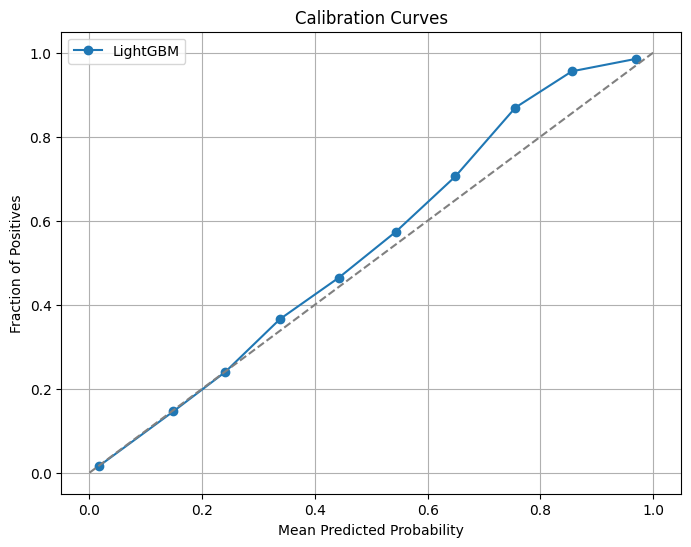

In [19]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))

# LightGBM calibration curve
prob_true_lgbm, prob_pred_lgbm = calibration_curve(y_test, lgbm_probs, n_bins=10)
plt.plot(prob_pred_lgbm, prob_true_lgbm, marker='o', label='LightGBM')

# XGBoost calibration curve
# prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, xgb_probs, n_bins=10)
# plt.plot(prob_pred_xgb, prob_true_xgb, marker='o', label='XGBoost')

# Reference line for perfectly calibrated model
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('Calibration Curves')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid()
plt.show()

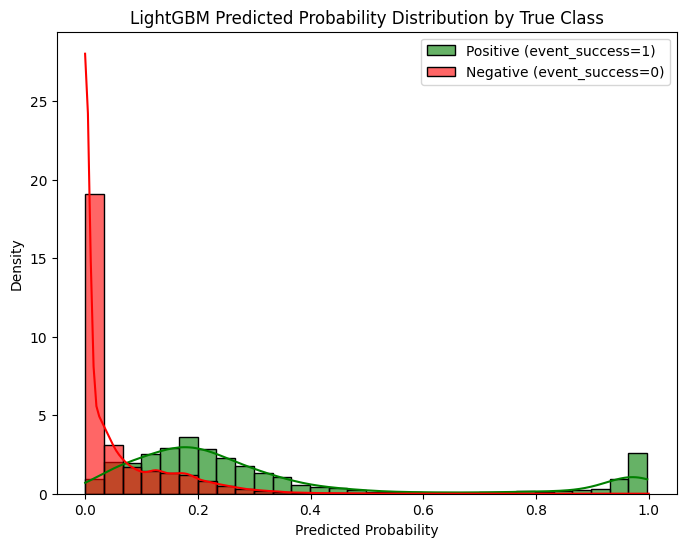

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# LightGBM predicted probabilities histogram by class
sns.histplot(lgbm_probs[y_test == 1], color='green', label='Positive (event_success=1)', kde=True, stat='density', bins=30, alpha=0.6)
sns.histplot(lgbm_probs[y_test == 0], color='red', label='Negative (event_success=0)', kde=True, stat='density', bins=30, alpha=0.6)

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('LightGBM Predicted Probability Distribution by True Class')
plt.legend()
plt.show()

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X2 = alldf.select_dtypes(include='number').drop(columns=['xPlayStopped','goal','xGoal','shotPlayContinuedOutsideZone','xPlayContinuedInZone','shotPlayContinuedInZone','timeUntilNextEvent','xPlayContinuedOutsideZone','goalieIdForShot','xShotWasOnGoal','xRebound','shotGeneratedRebound','xFroze'])
y2 = alldf['goal']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

In [ ]:
# Train model
model = lgb.LGBMClassifier()
model.fit(X_train2, y_train2)

# Get model feature importances
importances = pd.Series(model.feature_importances_, index=X_train2.columns)

# Combine with correlation
correlation = X_train2.corrwith(y_train2).abs()

# Drop features that are both weakly correlated and unimportant
features_to_drop = correlation[(correlation < 0.05) & (importances < 5)].index


[LightGBM] [Info] Number of positive: 50446, number of negative: 674321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14204
[LightGBM] [Info] Number of data points in the train set: 724767, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.069603 -> initscore=-2.592803
[LightGBM] [Info] Start training from score -2.592803


In [ ]:
features_to_drop

Index(['isPlayoffGame', 'period', 'homeTeamGoals', 'shotRush',
       'playerNumThatDidLastEvent'],
      dtype='object')

In [ ]:
impdf = pd.DataFrame(importances,columns=['imp'])

In [ ]:
impdf.sort_values(by='imp',ascending=False).head(20)

,imp
season,149
timeSinceLastEvent,133
shotDistance,115
shotGoalieFroze,97
speedFromLastEvent,80
shotWasOnGoal,78
lastEventyCord_adjusted,77
homeSkatersOnIce,77
arenaAdjustedShotDistance,75
shotOnEmptyNet,72


In [ ]:
features_to_keep = correlation[(correlation >= 0.05) | (importances >= 5)].index
features_to_keep


Index(['shotID', 'season', 'game_id', 'homeTeamWon', 'id', 'time',
       'timeSinceLastEvent', 'shotGoalieFroze', 'shotPlayStopped',
       'awayTeamGoals', 'xCord', 'yCord', 'xCordAdjusted', 'yCordAdjusted',
       'shotAngle', 'shotAngleAdjusted', 'shotAnglePlusRebound',
       'shotAngleReboundRoyalRoad', 'shotDistance', 'shotOnEmptyNet',
       'shotRebound', 'shotAnglePlusReboundSpeed', 'speedFromLastEvent',
       'lastEventxCord', 'lastEventyCord', 'distanceFromLastEvent',
       'lastEventShotAngle', 'lastEventShotDistance', 'homeEmptyNet',
       'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce',
       'awayPenalty1TimeLeft', 'awayPenalty1Length', 'homePenalty1TimeLeft',
       'homePenalty1Length', 'playerNumThatDidEvent',
       'lastEventxCord_adjusted', 'lastEventyCord_adjusted',
       'timeSinceFaceoff', 'shooterPlayerId', 'shooterTimeOnIce',
       'shooterTimeOnIceSinceFaceoff', 'shootingTeamForwardsOnIce',
       'shootingTeamDefencemenOnIce', 'shootingTeamAver

In [15]:
finalfeats = ['season','time',
       'timeSinceLastEvent', 'shotGoalieFroze', 'shotPlayStopped',
       'awayTeamGoals', 'xCord', 'yCord', 'xCordAdjusted', 'yCordAdjusted',
       'shotAngle', 'shotAngleAdjusted', 'shotAnglePlusRebound',
       'shotAngleReboundRoyalRoad', 'shotDistance', 'shotOnEmptyNet',
       'shotRebound', 'shotAnglePlusReboundSpeed', 'speedFromLastEvent',
       'lastEventxCord', 'lastEventyCord', 'distanceFromLastEvent',
       'lastEventShotAngle', 'lastEventShotDistance', 'homeEmptyNet',
       'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce',
       'awayPenalty1TimeLeft', 'awayPenalty1Length', 'homePenalty1TimeLeft',
       'homePenalty1Length', 'playerNumThatDidEvent',
       'lastEventxCord_adjusted', 'lastEventyCord_adjusted',
       'timeSinceFaceoff', 'shooterPlayerId', 'shooterTimeOnIce',
       'shooterTimeOnIceSinceFaceoff', 'shootingTeamForwardsOnIce',
       'shootingTeamDefencemenOnIce', 'shootingTeamAverageTimeOnIce',
       'shootingTeamAverageTimeOnIceOfForwards',
       'shootingTeamAverageTimeOnIceOfDefencemen', 'shootingTeamMaxTimeOnIce',
       'shootingTeamMaxTimeOnIceOfForwards',
       'shootingTeamMaxTimeOnIceOfDefencemen', 'shootingTeamMinTimeOnIce',
       'shootingTeamMinTimeOnIceOfForwards',
       'shootingTeamMinTimeOnIceOfDefencemen',
       'shootingTeamAverageTimeOnIceSinceFaceoff',
       'shootingTeamAverageTimeOnIceOfForwardsSinceFaceoff',
       'shootingTeamAverageTimeOnIceOfDefencemenSinceFaceoff',
       'shootingTeamMaxTimeOnIceSinceFaceoff',
       'shootingTeamMaxTimeOnIceOfForwardsSinceFaceoff',
       'shootingTeamMaxTimeOnIceOfDefencemenSinceFaceoff',
       'shootingTeamMinTimeOnIceSinceFaceoff',
       'shootingTeamMinTimeOnIceOfForwardsSinceFaceoff',
       'shootingTeamMinTimeOnIceOfDefencemenSinceFaceoff',
       'defendingTeamForwardsOnIce', 'defendingTeamDefencemenOnIce',
       'defendingTeamAverageTimeOnIce',
       'defendingTeamAverageTimeOnIceOfForwards',
       'defendingTeamAverageTimeOnIceOfDefencemen',
       'defendingTeamMaxTimeOnIce', 'defendingTeamMaxTimeOnIceOfForwards',
       'defendingTeamMaxTimeOnIceOfDefencemen', 'defendingTeamMinTimeOnIce',
       'defendingTeamMinTimeOnIceOfForwards',
       'defendingTeamMinTimeOnIceOfDefencemen',
       'defendingTeamAverageTimeOnIceSinceFaceoff',
       'defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff',
       'defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff',
       'defendingTeamMaxTimeOnIceSinceFaceoff',
       'defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff',
       'defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff',
       'defendingTeamMinTimeOnIceSinceFaceoff',
       'defendingTeamMinTimeOnIceOfForwardsSinceFaceoff',
       'defendingTeamMinTimeOnIceOfDefencemenSinceFaceoff', 'offWing',
       'arenaAdjustedShotDistance', 'arenaAdjustedXCord', 'arenaAdjustedYCord',
       'arenaAdjustedYCordAbs', 'timeDifferenceSinceChange',
       'averageRestDifference', 'isHomeTeam', 'shotWasOnGoal',
       'arenaAdjustedXCordABS']

In [ ]:
olddf = pd.DataFrame()
for i in range(2007,2017):
        url = f"https://peter-tanner.com/moneypuck/downloads/shots_{i}.zip"
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Step 2: Open the ZIP file from the response content
            with zipfile.ZipFile(io.BytesIO(response.content)) as z:
                # List the files inside the ZIP to find the CSV file
                print("Files in the ZIP archive:", z.namelist())
                
                # Step 3: Read the CSV file into a pandas DataFrame
                # Assuming the CSV file is the first in the list or you can specify the filename
                csv_filename = z.namelist()[0]  # Update this if you know the exact filename
                with z.open(csv_filename) as csv_file:
                    df = pd.read_csv(csv_file)
                    olddf = pd.concat([olddf,df])

Files in the ZIP archive: ['shots_2007.csv']
Files in the ZIP archive: ['shots_2008.csv']
Files in the ZIP archive: ['shots_2009.csv']
Files in the ZIP archive: ['shots_2010.csv']
Files in the ZIP archive: ['shots_2011.csv']
Files in the ZIP archive: ['shots_2012.csv']
Files in the ZIP archive: ['shots_2013.csv']
Files in the ZIP archive: ['shots_2014.csv']
Files in the ZIP archive: ['shots_2015.csv']
Files in the ZIP archive: ['shots_2016.csv']


In [ ]:
olddf['season'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [ ]:
# Ensure old_data has the same preprocessing as training data
old_data_filtered = olddf[finalfeats].copy()

# Predict xG for each shot
xg_preds = lgbm_model.predict_proba(old_data_filtered)[:, 1]

# Add to dataframe for analysis
olddf['xG'] = xg_preds


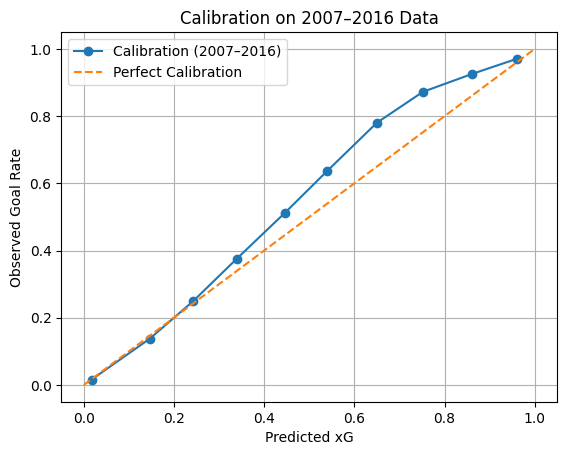

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Assume 'goal' is the binary label column
true_labels = olddf['goal'].astype(int)

prob_true, prob_pred = calibration_curve(true_labels, xg_preds, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Calibration (2007–2016)')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Predicted xG")
plt.ylabel("Observed Goal Rate")
plt.title("Calibration on 2007–2016 Data")
plt.legend()
plt.grid(True)
plt.show()

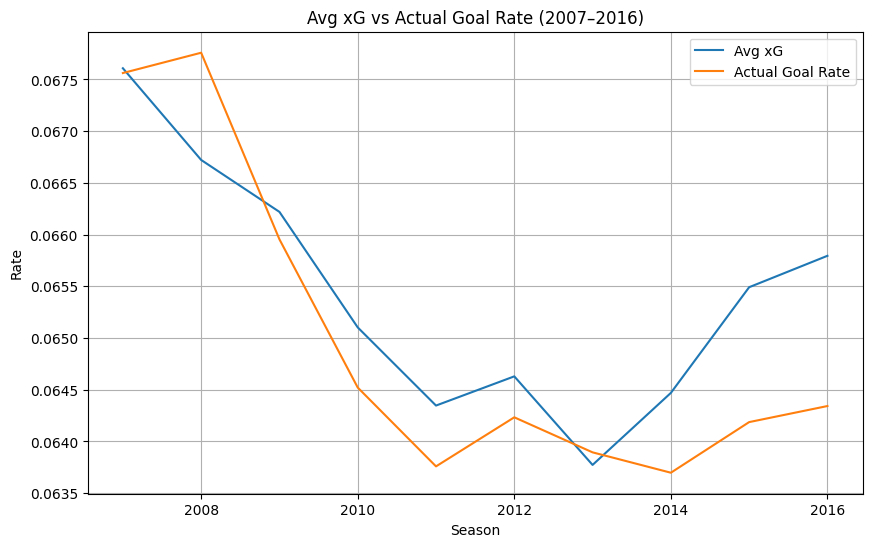

In [ ]:
# olddf['season'] = olddf['gameDate'].str[:4].astype(int)  # Or however your date is formatted

season_summary = olddf.groupby('season').agg(
    avg_xG=('xG', 'mean'),
    goal_rate=('goal', 'mean'),
    count=('goal', 'count')
).reset_index()

plt.figure(figsize=(10,6))
plt.plot(season_summary['season'], season_summary['avg_xG'], label='Avg xG')
plt.plot(season_summary['season'], season_summary['goal_rate'], label='Actual Goal Rate')
plt.xlabel("Season")
plt.ylabel("Rate")
plt.title("Avg xG vs Actual Goal Rate (2007–2016)")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import pickle
with open('nhlshotmodel.pkl', 'wb') as f:
    pickle.dump(lgbm_model, f)